In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
from datetime import datetime

import seaborn as sns
sns.set(font_scale=1.3)
sns.set_style("whitegrid")

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

# Stats calculation for parameter(s) of interest
<a id='stats_calc'></a>

In [47]:
def stats_calc(df,col):
    col_max = df[col].max()
    col_min = df[col].min()
    col_mean = df[col].mean()
    col_sd = df[col].std()
    col_range = col_max-col_min
    col_range_perc = 100*(col_range/col_mean)
    return col,col_max,col_min,col_mean,col_sd,col_range,col_range_perc

### Import CSV data file into dataframe

In [3]:
#filepath = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython\Results1-Trend=0.csv'
#filepath = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\Python Files\Results27May16-CHHIP-Trend=0.csv'
#filepath = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\Python Files\Results15June16-CHHIP_74-Trend=0.csv'
filepath = r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\Python Files\Results16June16-CHHIP_74-Trend=0-ab_sdvar.csv'

print(filepath)

all_data = pd.read_csv(filepath)
all_data.head(2)
#all_data.describe()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\Python Files\Results16June16-CHHIP_74-Trend=0-ab_sdvar.csv


,n,k,ab,ab_sd,d,d_shift,d_sd,d_trend,n0,max_d,d_interest,k_1,k_2,k_3,k_4,k_5
0,500.0,5.0,2.0,0.2,2.0,-4.0,0.5,0.0,145.0,100.0,64.0,30.839568,30.665245,30.937283,30.87587,30.920639
1,500.0,5.0,2.0,0.4,2.0,-4.0,0.5,0.0,145.0,100.0,64.0,30.407299,31.043460,31.690852,30.93498,32.023569


### Add columns with k_mean and k_sd

In [11]:
## create list of all columns contianing 'k_' to then allow calcs of mean etc
##note that the k value is listed to can be used to exclude any other values added afterwards.
k_list = [col for col in all_data.columns if 'k_' in col][:int(all_data['k'].mean())] # only return the number of k's specified
#k_list

## Add new columns with calcualted mean and sd
all_data['k_mean'] = np.nan
all_data['k_sd'] = np.nan
all_data['k_mean'] = all_data[k_list].mean(axis=1)
all_data['k_sd'] = all_data[k_list].std(axis=1)
all_data.describe()

,n,k,ab,ab_sd,d,d_shift,d_sd,d_trend,n0,max_d,d_interest,k_1,k_2,k_3,k_4,k_5,k_mean,k_sd
count,16065.0,16065.0,16065.000000,16065.000000,16065.0,16065.000000,16065.0,16065.0,16065.000000,16065.0,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000
mean,500.0,5.0,3.000000,0.600000,2.0,0.000000,0.5,0.0,160.000000,100.0,72.000000,77.943919,77.944154,77.946283,77.945916,77.948507,77.945756,0.472386
std,0.0,0.0,0.816522,0.282852,0.0,2.449566,0.0,0.0,10.000311,0.0,5.164139,19.036483,19.025135,19.032996,19.027037,19.024000,19.020682,0.422738
min,500.0,5.0,2.000000,0.200000,2.0,-4.000000,0.5,0.0,145.000000,100.0,64.000000,24.256310,24.898680,24.839241,24.988543,24.370193,24.793798,0.003510
25%,500.0,5.0,2.000000,0.400000,2.0,-2.000000,0.5,0.0,150.000000,100.0,68.000000,64.181412,64.269870,64.250960,64.286929,64.249168,64.287287,0.140010
50%,500.0,5.0,3.000000,0.600000,2.0,0.000000,0.5,0.0,160.000000,100.0,72.000000,84.915267,84.850078,84.922561,84.784654,84.861551,84.883911,0.340912
75%,500.0,5.0,4.000000,0.800000,2.0,2.000000,0.5,0.0,170.000000,100.0,76.000000,94.065522,94.097169,94.067064,94.088228,94.085702,94.082624,0.699045
max,500.0,5.0,4.000000,1.000000,2.0,4.000000,0.5,0.0,175.000000,100.0,80.000000,99.392185,99.394146,99.385746,99.390838,99.394375,99.391458,2.795419


### Filter results based on values and check to see which parameters have multiple/unique values
 - Only parameters with multiple values need stats calcualting.
 - Should only have 1 with varied values or calcualted stats are meaningless

In [15]:
d = all_data[(all_data.ab>=0) # this will not restrict any values but allows simpler editing of the other filters
            & (all_data.ab==3)
            & (all_data.ab_sd == 0.6)
            & (all_data.d==2)
            #& (all_data.d_shift==0)
            & (all_data.d_sd == 0.5)
            & (all_data.d_trend == 0)
            & (all_data.n0 == 160)
            & (all_data.d_interest == 74)
            ]
#d.describe()
print("There are " + str(d.shape[0]) + " result sets returned")
d

There are 17 result sets returned


,n,k,ab,ab_sd,d,d_shift,d_sd,d_trend,n0,max_d,d_interest,k_1,k_2,k_3,k_4,k_5,k_mean,k_sd
507,500.0,5.0,3.0,0.6,2.0,-4.0,0.5,0.0,160.0,100.0,74.0,82.141227,82.531007,83.174078,84.024368,82.964216,82.966979,0.712901
1452,500.0,5.0,3.0,0.6,2.0,-3.5,0.5,0.0,160.0,100.0,74.0,83.651834,83.468250,83.728714,83.819246,83.270324,83.587673,0.219435
2397,500.0,5.0,3.0,0.6,2.0,-3.0,0.5,0.0,160.0,100.0,74.0,85.560061,84.557351,84.501508,83.840220,84.828906,84.657609,0.621753
3342,500.0,5.0,3.0,0.6,2.0,-2.5,0.5,0.0,160.0,100.0,74.0,85.190575,83.466881,84.624407,84.367513,84.070527,84.343980,0.640312
4287,500.0,5.0,3.0,0.6,2.0,-2.0,0.5,0.0,160.0,100.0,74.0,85.261704,84.759486,85.498515,85.657379,85.804196,85.396256,0.408851
5232,500.0,5.0,3.0,0.6,2.0,-1.5,0.5,0.0,160.0,100.0,74.0,85.437570,86.081779,86.276155,86.865869,85.238307,85.979936,0.657109
6177,500.0,5.0,3.0,0.6,2.0,-1.0,0.5,0.0,160.0,100.0,74.0,85.979734,87.064460,86.615723,85.988172,86.470324,86.423682,0.457277
7122,500.0,5.0,3.0,0.6,2.0,-0.5,0.5,0.0,160.0,100.0,74.0,87.050758,87.167274,87.154802,87.275708,87.602595,87.250227,0.212478
8067,500.0,5.0,3.0,0.6,2.0,0.0,0.5,0.0,160.0,100.0,74.0,88.068687,88.533954,87.235713,87.946190,87.383932,87.833695,0.528703
9012,500.0,5.0,3.0,0.6,2.0,0.5,0.5,0.0,160.0,100.0,74.0,88.534253,87.943575,88.035024,88.818278,88.325739,88.331374,0.359332


In [48]:
print("There are " + str(d.shape[0]) + " result sets returned")
#print(d.head(3))
#print('-----')

## create df with only model parameters
col_list = [col for col in d.columns if not 'k_' in col]
d_new = d[col_list]
#d_new.head()

## count number of unique values and put in array
## if all are unique then give message saying so
#print(d_new.shape[1])
no_vals = []
for column in d_new:
    no_vals.append(len(d_new[column].unique()))
print(no_vals)

## Print the columns containing a range of values
## Useful for confirming the variation to be looked at for further analysis.
print("Parameter(s) with varied values:")
col_all=[]
for i in range(len(no_vals)):
    if no_vals[i]>1:
        col = d_new.columns[i]
        col_all.append(col)
        
print(col_all)

## Want to count number of values > 1 to check if filtering is complete enough as only want 1 varied parameter to check.
varied_count = 0
for i in range(len(no_vals)):
    if(no_vals[i])>1:
        varied_count = varied_count+1
## If varied_count > 1 then should alert user
if varied_count>1:
    print("***** More than 1 varied parameter!!")
elif varied_count<1:
    print("***** No Varied Parameters!!!!")
else:
    print("Single varied parameter - OK to continue")

There are 9 result sets returned
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9]
Parameter(s) with varied values:
['d_interest']
Single varied parameter - OK to continue


### Create dataframe containing calculated stats
- Stats calcualted using the function above
[Stats Calc](#stats_calc)

In [49]:
stats = [('parameter','max','min','mean','sd','range','range_perc')]
all_params = ['k_mean','k_sd'] + col_all

for x in all_params:
    a = stats_calc(d,x)
    stats.append(a)

stats_df = pd.DataFrame(stats)
stats_df.columns = stats_df.iloc[0]

#df.columns = df.iloc[1]
stats_df= stats_df[1:].reset_index(drop=True)

stats_df.to_clipboard() # copies df to clipboard
stats_df

,parameter,max,min,mean,sd,range,range_perc
0,k_mean,92.477,72.4583,84.3512,6.7865,20.0186,23.7325
1,k_sd,1.01606,0.162968,0.490261,0.26773,0.85309,174.007
2,d_interest,80,64,72,5.47723,16,22.2222


In [55]:
results_df = pd.read_csv(r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\TCP_analysis_results.txt',sep='\t')
results_df

,param,range_perc,TCP_effect_perc,TCP_per_param_perc
0,ab_sd,133.33,8.15,0.06
1,ab,66.67,44.23,0.66
2,d_shift,8.00,9.98,1.25
3,n0,18.75,2.33,0.12
4,d_interest,22.22,23.73,1.07


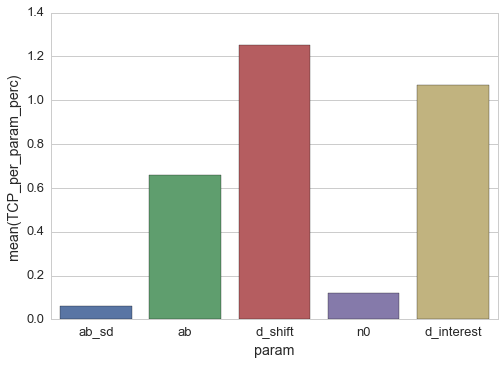

In [125]:
x=results_df['param']
y=results_df['TCP_per_param_perc']

effect_plot = sns.barplot(x, y, palette='deep')